In [1]:
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [2]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [3]:
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [4]:
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.5533188 , -0.561052  , -0.40289292, -0.18387559,  0.49359578,
          0.4331779 , -0.06158412,  0.03919524, -0.10956943,  0.54130226],
        [ 0.29880285, -0.0867933 ,  0.04790813, -0.09385931,  0.02132958,
          0.23059219,  0.29319018, -0.04738504,  0.4959553 , -0.5496675 ],
        [ 0.20868903,  0.4647488 ,  0.6114271 , -0.19748929, -0.2837098 ,
          0.61060995, -0.09532344,  0.20534271, -0.22063771, -0.40411115],
        [ 0.28063112,  0.5375809 ,  0.21291155,  0.24336642, -0.43725505,
          0.5305131 ,  0.12785518,  0.33896965,  0.17538512,  0.5858337 ],
        [-0.20099667, -0.343865  ,  0.28221428,  0.55839556, -0.0724836 ,
          0.26437426,  0.32702625,  0.327747  ,  0.5248366 ,  0.12855124]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [5]:
layer.kernel

<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.5533188 , -0.561052  , -0.40289292, -0.18387559,  0.49359578,
         0.4331779 , -0.06158412,  0.03919524, -0.10956943,  0.54130226],
       [ 0.29880285, -0.0867933 ,  0.04790813, -0.09385931,  0.02132958,
         0.23059219,  0.29319018, -0.04738504,  0.4959553 , -0.5496675 ],
       [ 0.20868903,  0.4647488 ,  0.6114271 , -0.19748929, -0.2837098 ,
         0.61060995, -0.09532344,  0.20534271, -0.22063771, -0.40411115],
       [ 0.28063112,  0.5375809 ,  0.21291155,  0.24336642, -0.43725505,
         0.5305131 ,  0.12785518,  0.33896965,  0.17538512,  0.5858337 ],
       [-0.20099667, -0.343865  ,  0.28221428,  0.55839556, -0.0724836 ,
         0.26437426,  0.32702625,  0.327747  ,  0.5248366 ,  0.12855124]],
      dtype=float32)>

In [6]:
layer.bias

<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [7]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
    
    def call(self, input):
        return tf.matmul(input, self.kernel)
    
layer = MyDenseLayer(10)

In [8]:
_ = layer(tf.zeros([10, 5]))

In [9]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


In [10]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__()
        filters1, filters2, filters3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)
    
block = ResnetIdentityBlock(1, [1, 2, 3])

In [11]:
_ = block(tf.zeros([1, 2, 3, 3]))

In [12]:
block.layers

In [13]:
block.summary()

Model: "resnet_identity_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  4         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  8         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  9         
_________________________________________________________________
batch_normalization_2 (Batch multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
________________________________________________

In [14]:
len(block.variables)

18

In [15]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])


In [16]:
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [17]:
my_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 1)     4         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 2)     4         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, None, 2)     8         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 3)     9         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 3)     12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
___________________________________________________________

In [18]:
# Custom Training

import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.1
Eager execution: True


In [20]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)
print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\Biplob\.keras\datasets\iris_training.csv


In [21]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [22]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp, batch_size, column_names=column_names, label_name=label_name, num_epochs=1
)

In [23]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5. , 5.6, 6.8, 4.5, 5.1, 5.2, 6.3, 7.7, 5.8, 4.9, 6.7, 5.2, 7.7,
       6.5, 5. , 4.6, 4.8, 6.4, 4.9, 5.1, 4.7, 5.5, 5.1, 5. , 5.8, 4.9,
       7.2, 5. , 5.7, 4.6, 6.2, 6.3], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.3, 2.5, 2.8, 2.3, 3.8, 2.7, 2.5, 3.8, 2.6, 3.1, 3. , 3.5, 2.8,
       3. , 3.6, 3.6, 3. , 3.1, 3. , 3.8, 3.2, 2.4, 3.5, 3.4, 2.7, 3.1,
       3.6, 3.4, 4.4, 3.2, 3.4, 3.4], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.3, 3.9, 4.8, 1.3, 1.6, 3.9, 5. , 6.7, 4. , 1.5, 5.2, 1.5, 6.7,
       5.8, 1.4, 1. , 1.4, 5.5, 1.4, 1.5, 1.3, 3.8, 1.4, 1.6, 5.1, 1.5,
       6.1, 1.5, 1.5, 1.4, 5.4, 5.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1. , 1.1, 1.4, 0.3, 0.2, 1.4, 1.9, 2.2, 1.2, 0.1, 2.3, 0.2, 2. ,
       2.2, 0.2, 0.2, 0.1, 1.8, 0.2, 0.3, 0.2, 1.1, 0.3, 0.4,

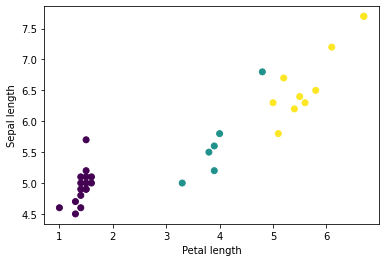

In [24]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [25]:
def peak_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [26]:
train_dataset = train_dataset.map(peak_features_vector)

In [27]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.6 3.4 1.4 0.3]
 [4.9 3.1 1.5 0.1]
 [5.  2.  3.5 1. ]
 [6.  2.9 4.5 1.5]
 [5.9 3.2 4.8 1.8]], shape=(5, 4), dtype=float32)


In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [29]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.9765136 , -2.0012817 ,  0.874027  ],
       [ 1.1243234 , -2.1600776 ,  1.0089068 ],
       [-0.14871061, -1.7963134 ,  1.0183159 ],
       [-0.37901187, -2.1991818 ,  1.1223325 ],
       [-0.6558814 , -2.167361  ,  0.9844811 ]], dtype=float32)>

In [30]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.5119029 , 0.02605839, 0.46203858],
       [0.518549  , 0.01942641, 0.46202457],
       [0.22701801, 0.04370343, 0.7292786 ],
       [0.17700003, 0.0286737 , 0.79432625],
       [0.15679826, 0.03458709, 0.8086147 ]], dtype=float32)>

In [31]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 0 2 2 0 0 2 0 2 0 2 0 2 2 0]
    Labels: [0 0 1 1 1 1 2 2 1 1 1 2 1 0 2 0 1 0 0 2 2 0 0 2 0 2 0 1 0 2 1 0]


In [32]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [33]:
def loss(model, x, y, training):
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)

In [34]:
print(f"Loss test {l}")

Loss test 1.545389175415039


In [35]:
def grad(model, inputs, targets):
    with tf.GradientTape() as Tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [36]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
loss_value, grads = grad(model, features, labels)
print(f"Step: {optimizer.iterations.numpy()}, Initial Loss {loss_value.numpy()}")

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print(f"Step: {optimizer.fractions.num}, Loss: {}")